# THE NORTH FACE - ECOMMERCE ANALYSIS
## PART 3: TOPIC MODELING

In [60]:
!pip install wordcloud -q

In [61]:
# Importing useful librairies
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Importing the cleaned description from previous preprocessing
dataset = pd.read_csv("Cleaned_descriptions.csv")
dataset.head()

,clean_token
0,active classic boxer reason boxer cult fav...
1,active sport boxer brief skin glory requir...
2,active sport brief superbreathable fly bri...
3,alpine guide pant skin climb ice swi...
4,alpine wind jkt high ridge steep ice al...


### CREATING THE TF-IDF MATRIX

In [17]:
# Instanciating TFidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', smooth_idf = True)

# Fitting and transforming on the clean description column
X = vectorizer.fit_transform(dataset["clean_token"])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## TOPIC MODELING THROUGH TRUNCKATED SVD
### 1) 10 TOPICS

In [94]:
# Instanciating and fitting model on X - 10 topics
svd_model_10topics = TruncatedSVD(n_components = 10, algorithm = 'randomized', n_iter = 100, random_state = 122)
lsa_10 = svd_model_10topics.fit_transform(X)

In [95]:
# Displaying the topic Matrix and the related document
topics_10_encoded_df = pd.DataFrame(lsa_10, columns = ["topic_"+str(i) for i in range(1,11)])
topics_10_encoded_df["description"] = dataset["clean_token"]
topics_10_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,description
0,0.265928,-0.053826,0.185775,0.105641,-0.120116,-0.009664,-0.075987,-0.011294,0.123714,-0.107800,active classic boxer reason boxer cult fav...
1,0.296602,-0.057695,0.097976,0.112669,-0.027373,0.143605,-0.015713,-0.012766,0.065462,-0.128134,active sport boxer brief skin glory requir...
2,0.291926,-0.085794,0.116634,0.034412,-0.032301,0.136360,0.076104,0.052235,0.071939,-0.055791,active sport brief superbreathable fly bri...
3,0.395692,-0.236790,-0.103091,-0.141838,0.037808,-0.001748,-0.038211,-0.047347,-0.054256,-0.158679,alpine guide pant skin climb ice swi...
4,0.392747,-0.257148,-0.000724,-0.241463,-0.043039,-0.033487,0.044930,0.080616,-0.150800,-0.130568,alpine wind jkt high ridge steep ice al...


In [90]:
# Extracting the most relevant topic for each description
topics_10_encoded_df["most_relevant_topic"] = topics_10_encoded_df.iloc[:,:-1].abs().idxmax(axis =1)
topics_10_encoded_df["most_relevant_topic"] = topics_10_encoded_df["most_relevant_topic"].str.replace("topic_","")
topics_10_encoded_df["most_relevant_topic"] = topics_10_encoded_df["most_relevant_topic"].astype(int)
topics_10_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,description,most_relevant_topic
0,0.265928,-0.053826,0.185775,0.105641,-0.120116,-0.009664,-0.075987,-0.011294,0.123714,-0.107800,active classic boxer reason boxer cult fav...,1
1,0.296602,-0.057695,0.097976,0.112669,-0.027373,0.143605,-0.015713,-0.012766,0.065462,-0.128134,active sport boxer brief skin glory requir...,1
2,0.291926,-0.085794,0.116634,0.034412,-0.032301,0.136360,0.076104,0.052235,0.071939,-0.055791,active sport brief superbreathable fly bri...,1
3,0.395692,-0.236790,-0.103091,-0.141838,0.037808,-0.001748,-0.038211,-0.047347,-0.054256,-0.158679,alpine guide pant skin climb ice swi...,1
4,0.392747,-0.257148,-0.000724,-0.241463,-0.043039,-0.033487,0.044930,0.080616,-0.150800,-0.130568,alpine wind jkt high ridge steep ice al...,1


In [91]:
# Extracting components of topics
dic = vectorizer.vocabulary_
dic_sorted = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
topic = pd.DataFrame(svd_model_10topics.components_, index = ["topic_"+str(i) for i in range(1,11)])
topic.columns = dic_sorted.keys()
topic

,11c,12d,3d,abandon,ability,able,abrasion,abrasive,abroad,absolute,...,yoke,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zone
topic_1,0.000181,0.000155,0.001033,0.001160,0.002354,0.000395,0.019923,0.000853,0.000860,0.000975,...,0.022110,0.003101,0.000669,0.001542,0.000652,0.091729,0.134201,0.018638,0.001869,0.007466
topic_2,0.000500,0.000377,-0.001462,-0.000580,-0.000859,-0.000378,-0.022093,-0.000722,0.000851,-0.000657,...,-0.003103,0.007246,-0.000368,0.004828,-0.000843,-0.057810,-0.144805,-0.020803,-0.002605,-0.009873
topic_3,-0.000091,-0.000071,-0.000806,0.003399,0.006112,-0.000031,-0.018922,-0.000167,-0.000217,0.002074,...,-0.006517,-0.000961,-0.000164,-0.000421,-0.000820,-0.078881,-0.085136,-0.018247,-0.001981,0.000146
topic_4,-0.000585,-0.000506,-0.002756,0.000731,0.000108,-0.000053,-0.014752,0.000884,0.001837,0.000575,...,0.030332,-0.005400,-0.000970,-0.003065,-0.000915,0.071471,-0.164406,-0.024144,-0.005253,-0.016907
topic_5,0.000193,0.000146,0.000516,-0.004315,-0.009435,0.000733,0.018533,-0.000784,-0.000133,0.002228,...,0.004694,0.000238,0.000087,0.000457,0.000448,-0.018218,-0.002069,0.009771,0.001049,0.021735
topic_6,0.001336,0.001076,0.001226,-0.000889,0.002546,0.002109,0.012799,0.002024,-0.003476,0.003541,...,0.011848,0.001332,0.003116,0.001437,0.000743,-0.059362,-0.079399,0.015701,-0.004729,0.006055
topic_7,-0.000720,-0.000504,-0.000594,-0.002421,-0.003624,-0.000542,0.000661,-0.002641,0.006046,0.002697,...,0.014630,-0.002073,0.000098,-0.002161,-0.000319,-0.091424,-0.036531,-0.019111,0.000407,0.016941
topic_8,-0.000155,-0.000140,0.007292,-0.002022,0.000702,0.000817,-0.048085,-0.001211,0.000704,0.000173,...,-0.004372,0.003466,0.000339,-0.000748,0.003050,-0.046101,0.019159,0.060455,-0.006238,-0.031981
topic_9,0.003106,0.002404,0.005749,0.004159,0.001093,0.001713,0.043761,-0.001537,-0.000356,0.000633,...,-0.005600,0.000296,0.001137,0.000067,0.001981,-0.029752,-0.058139,0.017002,0.000467,0.051184
topic_10,-0.002764,-0.002337,0.003625,-0.003159,0.010807,0.000317,0.024626,0.002290,0.002720,-0.000708,...,0.008163,0.000279,0.001254,-0.001452,0.000329,-0.073884,-0.062862,-0.005996,0.001939,0.039801


### VISUALIZATION

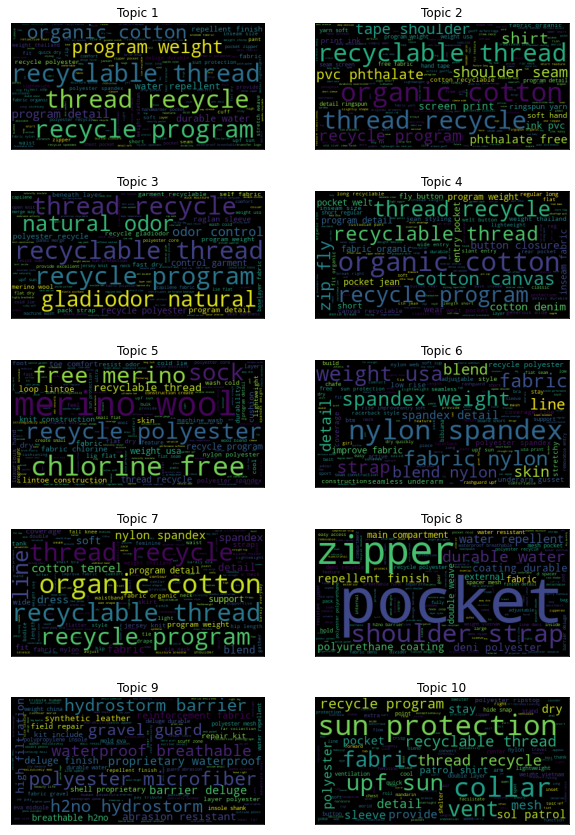

In [92]:
# Visualizing most important word of each topic in a word cloud.
wd = WordCloud()

fig, ax = plt.subplots(5, 2, figsize=(10, 15))
for i, axi in enumerate(ax.flat):
    
    corpus = ""
    mask_cluster = topics_10_encoded_df["most_relevant_topic"] == i+1
    
    for element in topics_10_encoded_df.loc[mask_cluster, "description"].values:
        corpus += element + " "

    cloud = wd.generate(corpus)
    
    axi.set_title("Topic {}".format(i+1))
    axi.imshow(cloud)
    axi.set(xticks=[], yticks=[])   

### 2) 20 TOPICS

In [96]:
# Instanciating and fitting model on X - 20 topics
svd_model_20topics = TruncatedSVD(n_components = 20, algorithm = 'randomized', n_iter = 100, random_state = 122)
lsa_20 = svd_model_20topics.fit_transform(X)

In [98]:
# Displaying the topic Matrix and the related document
topics_20_encoded_df = pd.DataFrame(lsa_20, columns = ["topic_"+str(i) for i in range(1,21)])
topics_20_encoded_df["description"] = dataset["clean_token"]
topics_20_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,description
0,0.265928,-0.053826,0.185775,0.105641,-0.120116,-0.009664,-0.075987,-0.011294,0.123714,-0.107800,...,-0.012019,0.082874,-0.009786,-0.016108,0.023954,0.012112,-0.007744,0.049214,0.085845,active classic boxer reason boxer cult fav...
1,0.296602,-0.057695,0.097976,0.112669,-0.027373,0.143605,-0.015713,-0.012766,0.065462,-0.128134,...,0.035832,0.107090,-0.004264,0.078862,0.073932,-0.082521,0.138590,0.013083,0.110495,active sport boxer brief skin glory requir...
2,0.291926,-0.085794,0.116634,0.034412,-0.032301,0.136360,0.076104,0.052235,0.071939,-0.055791,...,0.096957,0.116566,0.003507,0.087667,0.065191,-0.120332,0.077101,0.015608,0.115552,active sport brief superbreathable fly bri...
3,0.395692,-0.236790,-0.103091,-0.141838,0.037808,-0.001748,-0.038211,-0.047347,-0.054256,-0.158679,...,-0.119709,0.127132,-0.174407,0.064852,0.133676,-0.197675,-0.016597,0.046143,-0.070799,alpine guide pant skin climb ice swi...
4,0.392747,-0.257148,-0.000724,-0.241463,-0.043039,-0.033487,0.044930,0.080616,-0.150800,-0.130568,...,-0.217677,0.281703,0.139334,-0.009082,-0.011022,0.049647,-0.005931,0.059678,0.035136,alpine wind jkt high ridge steep ice al...


In [99]:
# Extracting the most relevant topic for each description
topics_20_encoded_df["most_relevant_topic"] = topics_20_encoded_df.iloc[:,:-1].abs().idxmax(axis =1)
topics_20_encoded_df["most_relevant_topic"] = topics_20_encoded_df["most_relevant_topic"].str.replace("topic_","")
topics_20_encoded_df["most_relevant_topic"] = topics_20_encoded_df["most_relevant_topic"].astype(int)
topics_20_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,description,most_relevant_topic
0,0.265928,-0.053826,0.185775,0.105641,-0.120116,-0.009664,-0.075987,-0.011294,0.123714,-0.107800,...,0.082874,-0.009786,-0.016108,0.023954,0.012112,-0.007744,0.049214,0.085845,active classic boxer reason boxer cult fav...,1
1,0.296602,-0.057695,0.097976,0.112669,-0.027373,0.143605,-0.015713,-0.012766,0.065462,-0.128134,...,0.107090,-0.004264,0.078862,0.073932,-0.082521,0.138590,0.013083,0.110495,active sport boxer brief skin glory requir...,1
2,0.291926,-0.085794,0.116634,0.034412,-0.032301,0.136360,0.076104,0.052235,0.071939,-0.055791,...,0.116566,0.003507,0.087667,0.065191,-0.120332,0.077101,0.015608,0.115552,active sport brief superbreathable fly bri...,1
3,0.395692,-0.236790,-0.103091,-0.141838,0.037808,-0.001748,-0.038211,-0.047347,-0.054256,-0.158679,...,0.127132,-0.174407,0.064852,0.133676,-0.197675,-0.016597,0.046143,-0.070799,alpine guide pant skin climb ice swi...,1
4,0.392747,-0.257148,-0.000724,-0.241463,-0.043039,-0.033487,0.044930,0.080616,-0.150800,-0.130568,...,0.281703,0.139334,-0.009082,-0.011022,0.049647,-0.005931,0.059678,0.035136,alpine wind jkt high ridge steep ice al...,1


### VISUALIZATION

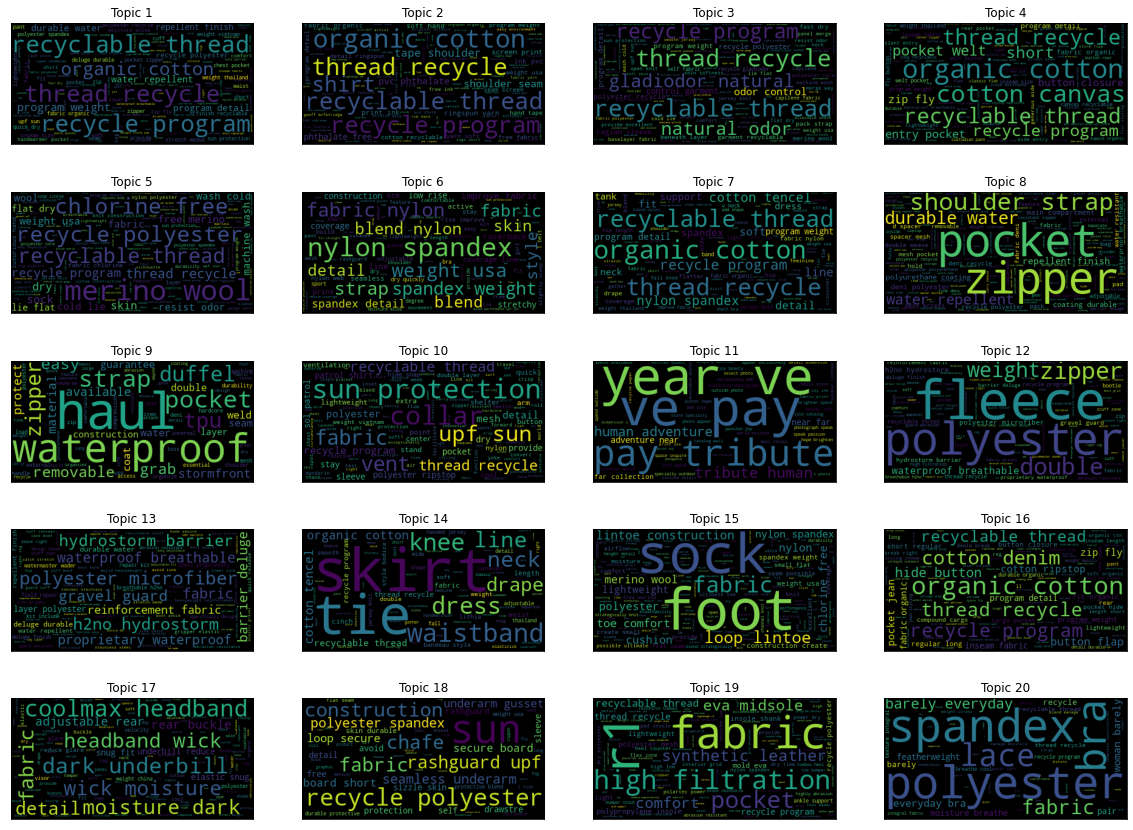

In [105]:
# Visualizing most important word of each topic in a word cloud.
wd = WordCloud()

fig, ax = plt.subplots(5, 4, figsize=(20, 15))
for i, axi in enumerate(ax.flat):
    
    corpus = ""
    mask_cluster = topics_20_encoded_df["most_relevant_topic"] == i+1
    
    for element in topics_20_encoded_df.loc[mask_cluster, "description"].values:
        corpus += element + " "

    cloud = wd.generate(corpus)
    
    axi.set_title("Topic {}".format(i+1))
    axi.imshow(cloud)
    axi.set(xticks=[], yticks=[])   